<h2>FIN5615 Project #3
    <p class="text-primary">Black Scholes Options Pricing</p>
</h2>

<div class = "alert alert-block alert-danger">
    <b>Due Date</b>: October 19th 2020, 11:59PM EST 
</div>

<div class = "panel panel-success">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Project Introduction</b>
    </div>
    <div class = "panel-body"> 
    The goal of this project is to build an options pricing calculator using the Black-Scholes pricing model. Our calculator will be able to price both put and call options as well as the following set of Greeks: delta, gamma, theta, vega, and rho. 
    </div>
</div>

<div class = "panel panel-info">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Instructions</b>
    </div>
    <div class = "panel-body"> 
    Please code you solutions directly in this Notebook under each task in the cells provided below. Include all code used to produce your results, and support your answers with textual explanations if neccessary. You may feel free to add additional Code and/or Markdown cells as needed. Code must be written using <b>Python 3</b>.
    <br><br>Please order the cells in your Notebook in the order in which they are intended to run! It is expected that your Notebook is able to run in sequence from start to finish without any errors (before submitting check by: <code>Kernel > Restart & Run All</code>).
    <br><br>Once ready, please submit your assignment as an <b>.ipynb file</b> (<code>File > Download as > Notebook</code>). You must name your files in the following format: <b><code>FIN5615_Assignmnet_1_Richard_Lee_tuc12345.ipynb</code></b>.
    </div>
</div>

---
<div class = "alert alert-block alert-warning">
    <b>Note</b>: Import all libraries that you plan on using in the code block below.
</div>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import scipy
from scipy.stats import norm

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 1</b>
    </div>
    <div class = "panel-body">
    Recall that the Black-Scholes formula for the price of a call option is: 
    <br><br>
    $$Call = S_0N(d_1) - Ke^{-rT}N(d_2)$$
    <br>$$d_1 = \frac{1}{\sigma\sqrt{T}}\left[\ln\left(\frac{S_0}{K}\right) + \left(r + \frac{1}{2}\sigma^2\right)T\right]$$
    <br>$$d_2 = d_1 - \sigma\sqrt{T}$$
    <br>Write an expression that can calculate the price of a call option using the Black-Scholes formula, given the follwowing variables:
    <ul>
        <li><code>stock_price</code> = price of underlying stock at time t</li>
        <li><code>strike</code> = strike price of the options contract</li>
        <li><code>term</code> = remaining time in years left on the option contract</li>
        <li><code>rf</code> = annual risk-free rate</li>
        <li><code>volatility</code> = annualized volatility of the underlying stock</li>
    </ul>
    <p style="text-align:right;">[5pts]</p>
    </div>
</div>
<div class = "alert alert-block alert-info">
    <b>Hint</b>: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
</div>

In [2]:
stock_price = 30
strike = 35     
term = 0.5
rf = .01
volatility = .2

d1 = (1/(volatility*(term**.5)))*((np.log(stock_price/strike))+((rf+(.5*(volatility**2)))*term))
d2 = d1 - volatility*(term**.5)



In [3]:
call = stock_price * norm.cdf(d1) - strike * (np.exp(-rf * term)) * norm.cdf(d2)
print(round(call,2))

0.34


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 2</b>
    </div>
    <div class = "panel-body"> 
    Write a function called <code>black_sholes_formula</code> that takes in <code>stock_price</code>, <code>strike</code>, <code>term</code>, <code>rf</code>, and <code>volatility</code> as input parameters, and outputs the price of a call option according to the Black-Scholes pricing model.
    <br><br>Double check that the function outputs the same price as the previous task under the following values:
    <ul>
        <li><code>stock_price</code> = \$30</li>
        <li><code>strike</code> = \$35</li>
        <li><code>term</code> = 6 months</li>
        <li><code>rf</code> = 1%</li>
        <li><code>volatility</code> = 0.2</li>
    </ul>
    <p style="text-align:right;">[5pts]</p>
    </div>
</div>

In [4]:
def black_sholes_formula(stock_price, strike, term, rf, volatility):

    d1 = (1/(volatility*(term**.5)))*((np.log(stock_price/strike))+((rf+(.5*(volatility**2)))*term))
    d2 = d1 - volatility*(term**.5)
    call = stock_price * norm.cdf(d1) - strike * (np.exp(-rf * term)) * norm.cdf(d2)
    
    return call

In [5]:
round(black_sholes_formula(30, 35, .5, .01, .2),2)

0.34

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 3</b>
    </div>
    <div class = "panel-body">
    Recall that the Black-Scholes formula for the price of a put option is:
    <br><br>
    $$Put = Ke^{-rT}N(-d_2) - S_0N(-d_1)$$
    <br>Modify the function <code>black_sholes_formula</code> by adding an extra input parameter <code>option</code> that can take on either the value <code>'call'</code> or <code>'put'</code>. Depending on the value assigned to the parameter <code>option</code>, <code>black_sholes_formula</code> will output either the price of a call or a put option.
    <br><br>Use the updated <code>black_sholes_formula</code> function to calculate the price of both a <b>call</b> and <b>put</b> option using the following input values:
    <ul>
        <li><code>stock_price</code> = \$30</li>
        <li><code>strike</code> = \$35</li>
        <li><code>term</code> = 6 months</li>
        <li><code>rf</code> = 1%</li>
        <li><code>volatility</code> = 0.2</li>
    </ul>
    <p style="text-align:right;">[5pts]</p>
    </div>
</div>

In [6]:
def black_sholes_formula (stock_price, strike, term, rf, volatility, option = 'call'):
    
    d1 = (1/(volatility*(term**.5)))*((np.log(stock_price/strike))+((rf+(.5*(volatility**2)))*term))
    d2 = d1 - volatility*(term**.5)

    if option == 'call':
        call = stock_price * norm.cdf(d1) - strike * (np.exp(-rf * term)) * norm.cdf(d2)
        return call
    elif option =='put':
        put = (strike * (np.exp(-rf * term)) * norm.cdf(-d2)) - stock_price * norm.cdf(-d1)
        return put
    else: 
        'print(Option must be a put or call)'

In [7]:
round(black_sholes_formula(30,35,.5,.01,.2, 'call'),2)

0.34

In [8]:
round(black_sholes_formula(30,35,.5,.01,.2, 'put'),2)

5.17

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 4</b>
    </div>
    <div class = "panel-body"> 
    Recall that the payoff of a call option is $\max(S_T - K, 0)$.
    <ul>
        <li>Price the value of the call option with \$35 strike, 6 months to termination, at 0.2 volatility and 1% risk-free rate, when stock price ranges from \$10 to \$60 (use \$0.50 increments).</li>
        <li>Also calculate the option's payoff assuming the same range of stock price at termination.</li>
        <li>Plot the ranges of call option prices and payoffs in a single line plot. Provide a legend, x-axis label, and title for the plot.</li>
    </ul>
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

In [9]:
def call_payoff(stock, strike):
    payoff = max(stock-strike,0.)
    return payoff

In [10]:
stock_prices = np.arange(10, 60.5, .5)

In [11]:
payoffs = [call_payoff(stock = price, strike = 35) for price in stock_prices]

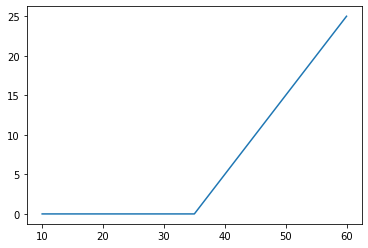

In [12]:
plt.plot(stock_prices, payoffs)
plt.show()

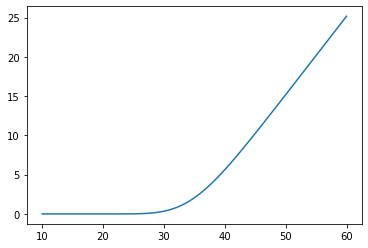

In [13]:
def call_price(stock, strike, term, rf, volatility):
    
    d1 = (1/(volatility*(term**.5)))*((np.log(stock/strike))+((rf+(.5*(volatility**2)))*term))
    d2 = d1 - volatility*(term**.5)
   
    call = stock * norm.cdf(d1) - strike * (np.exp(-rf * term)) * norm.cdf(d2)
    
    return call

stock_prices = np.arange(10, 60.5, .5)

prices = [call_price(stock = price, strike = 35,term = .5, rf = .01, volatility = .2) for price in stock_prices]

plt.plot(stock_prices, prices)
plt.show()

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 5</b>
    </div>
    <div class = "panel-body"> 
    Recall that given a continuous annual dividend rate $q$:
    <br><br>
    $$Call = S_0e^{-qT}N(d_1) - Ke^{-rT}N(d_2)$$
    <br>$$Put = Ke^{-rT}N(-d_2) - S_te^{-qT}N(-d_1)$$
    <br>$$d_1 = \frac{1}{\sigma\sqrt{T}}\left[\ln\left(\frac{S_0}{K}\right) + \left(r - q + \frac{1}{2}\sigma^2\right)T\right]$$
    <br>$$d_2 = d_1 - \sigma\sqrt{T}$$
    <ul>
        <li>Add an additional input parameter <code>dividend</code>, to the function <code>black_sholes_formula</code>, representing the continuous rate of dividend paid to shareholders by the stock, with a default value to equal to 0. Modify the Black-Scholes pricing formula to account for the dividend rate.</li>
        <li>Calculate the price of a call option where the stock price is \$30, strike is \$35, term is 6 months, volatility is 20%, that also pays a 2.5% annual dividend, using a risk-free rate of 1%.</li>
        <li>How does adding a dividend rate influence the price of a call option and why?</li>
    </ul>
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

In [14]:
def black_sholes_formula (stock_price, strike, term, rf, volatility, dividend):
    
    d1 = (1/(volatility*(term**.5)))*((np.log(stock_price/strike))+((rf - dividend +(.5*(volatility**2)))*term))
    d2 = d1 - volatility*(term**.5)
    call = stock_price*np.exp(-dividend*term) * norm.cdf(d1) - strike * (np.exp(-rf * term)) * norm.cdf(d2)
    
    return call

In [15]:
round(black_sholes_formula(30,35,.5,.01,.2,.025),2)

0.29

*Your written response here*

adding a dividend decreases the price of the call option becuase we are taking away from the risk-free rate.


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 6</b>
    </div>
    <div class = "panel-body">
    Write a function called <code>black_scholes_greeks</code> that takes in the same input parameters as <code>black_scholes_formula</code>, and calculates the option's greeks (delta, gamma, vega, theta, and rho) according to the below table :
    ![image.png](attachment:image.png)
    <br><br>Note that $N^{\prime}(x)$ is simply the pdf of the normal distribution.
    <br><br>The output should be returned in the form of dictionary with the following keys: <code>delta</code>, <code>gamma</code>, <code>vega</code>, <code>theta</code>, <code>rho</code>, each storing the corresponding greek value for the option. Run <code>black_scholes_greeks</code> on a call option where:
    <ul>
        <li><code>stock_price</code> = \$30</li>
        <li><code>strike</code> = \$35</li>
        <li><code>term</code> = 6 months</li>
        <li><code>rf</code> = 1%</li>
        <li><code>volatility</code> = 0.2</li>
        <li><code>dividend</code> = 2.5%</li>
    </ul>
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

In [16]:
def black_sholes_greeks(stock_price, strike, term, rf, volatility, dividend):
    d1 = (1/(volatility*(term**.5)))*((np.log(stock_price/strike))+((rf - dividend +(.5*(volatility**2)))*term))
    d2 = d1 - volatility*(term**.5)
    delta = norm.cdf(d1)
    gamma = norm.pdf(d1)/(stock_price*volatility*np.sqrt(term))
    theta = (-(stock_price*norm.pdf(d1)*volatility)/(2*np.sqrt(term)-rf*strike*np.exp(-rf*term)*norm.pdf(d2)))/360
    vega = (stock_price*norm.pdf(d1)*np.sqrt(term))/100
    rho = strike*term*np.exp(-rf*term)*norm.cdf(d2)/100
    
    print('delta =', delta) , print('gamma =', gamma) , print('theta =',theta) , print('vega =', vega) , print('rho =', rho)
    
    #_# Instead of returning the data as a list, I print the reullts with their labels 

In [17]:
black_sholes_greeks(30, 35, .5, .01, .2, .025)

delta = 0.14178541526457605
gamma = 0.05291477759776747
theta = -0.002776313669553605
vega = 0.04762329983799073
rho = 0.01957553740472613


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 7</b>
    </div>
    <div class = "panel-body"> 
    Modify the function <code>black_scholes_formula</code> to take in a <b>boolean</b> input parameter called <code>greeks</code> that can be either <code>True</code> or <code>False</code>, a default value of <code>False</code>.
    <br><br>If <code>greeks</code> is <code>True</code>, then in addition to producing the price of a call / put option, <code>black_scholes_formula</code> will also calculate the greeks of the option using the function <code>black_scholes_greeks</code>, and return the delta, gamma, vega, theta, and rho as a dictionary, in addition to the price of the option.
    <br><br>If <code>greeks</code> is <code>False</code>, then simply return the price of the option just like before. Run <code>black_scholes_formula</code> to price of a call option where:
    <ul>
        <li><code>stock_price</code> = \$30</li>
        <li><code>strike</code> = \$35</li>
        <li><code>term</code> = 6 months</li>
        <li><code>rf</code> = 1%</li>
        <li><code>volatility</code> = 0.2</li>
        <li><code>dividend</code> = 2.5%</li>
        <li><code>greeks</code> = True</li>
    </ul>
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

In [18]:
def black_sholes_formula(stock_price, strike, term, rf, volatility, dividend, option = 'call', greek = 'false'):
    d1 = (1/(volatility*(term**.5)))*((np.log(stock_price/strike))+((rf - dividend +(.5*(volatility**2)))*term))
    d2 = d1 - volatility*(term**.5)
    
    
    if option == 'call' and greek == 'true':
        delta = norm.cdf(d1)
        gamma = norm.pdf(d1)/(stock_price*volatility*np.sqrt(term))
        theta = (-(stock_price*norm.pdf(d1)*volatility)/(2*np.sqrt(term)-rf*strike*np.exp(-rf*term)*norm.pdf(d2)))/360
        vega = (stock_price*norm.pdf(d1)*np.sqrt(term))/100
        rho = strike*term*np.exp(-rf*term)*norm.cdf(d2)/100
        call = stock_price*np.exp(-dividend*term) * norm.cdf(d1) - strike * (np.exp(-rf * term)) * norm.cdf(d2)
        put = (strike * (np.exp(-rf * term)) * norm.cdf(-d2)) - stock_price * norm.cdf(-d1)
        print('call =', call) , print('delta =', delta) , print('gamma =', gamma) , print('theta =',theta) , print('vega =', vega) , print('rho =', rho)
    
    elif option == 'call' and greek == 'false':
        call = stock_price*np.exp(-dividend*term) * norm.cdf(d1) - strike * (np.exp(-rf * term)) * norm.cdf(d2)
        put = (strike * (np.exp(-rf * term)) * norm.cdf(-d2)) - stock_price * norm.cdf(-d1)
        print('call =', call)

    elif option == 'put' and greek == 'true':
        delta = norm.cdf(d1)
        gamma = norm.pdf(d1)/(stock_price*volatility*np.sqrt(term))
        theta = (-(stock_price*norm.pdf(d1)*volatility)/(2*np.sqrt(term)-rf*strike*np.exp(-rf*term)*norm.pdf(d2)))/360
        vega = (stock_price*norm.pdf(d1)*np.sqrt(term))/100
        rho = strike*term*np.exp(-rf*term)*norm.cdf(d2)/100
        call = stock_price*np.exp(-dividend*term) * norm.cdf(d1) - strike * (np.exp(-rf * term)) * norm.cdf(d2)
        put = (strike * (np.exp(-rf * term)) * norm.cdf(-d2)) - stock_price * norm.cdf(-d1)
        print('put =', put) , print('delta =', delta) , print('gamma =', gamma) , print('theta =',theta) , print('vega =', vega) , print('rho =', rho)
    else: 
        put = (strike * (np.exp(-rf * term)) * norm.cdf(-d2)) - stock_price * norm.cdf(-d1)
        print('put =', put)
        
#_# whichever condition is met will print the data speccific under its respective condition with a label

In [19]:
black_sholes_formula(30, 35, .5, .01, .2, .025, 'call', 'true')

call = 0.2856163755278227
delta = 0.14178541526457605
gamma = 0.05291477759776747
theta = -0.002776313669553605
vega = 0.04762329983799073
rho = 0.01957553740472613


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 8</b>
    </div>
    <div class = "panel-body"> 
    One of the assumptions to the Black-Scholes pricing model is that the risk-free interest rate is constant. However in practice, interest rates should follow a term structure, such as the spot curve.
    <br><br>Assume that the spot curve follows the below formula:
    <br><br>
    $$r(t) = \beta_0 + \beta_1\left(\frac{1 - e^{-\alpha t}}{\alpha t}\right) + \beta_2\left(\frac{1 - e^{-\alpha t}}{\alpha t} - e^{-\alpha t}\right)$$
    <br>Note that resulting $r(t)$ is expressed as a percentage. Set the parameters equal to the following values:
    <ul>
        <li>$\alpha = .7143$</li>
        <li>$\beta_0 = 2.99$</li>
        <li>$\beta_1 = -2.70$</li>
        <li>$\beta_2 = -2.12$</li>
    </ul>
    <br>Next:
    <ul>
        <li>Write a function that takes in <code>term</code> as an input parameter, then calculates and returns the spot rate according to the formula above.</li>
        <li>Plot the spot curve for terms ranging from 1 quarter to 30 years in quarterly increments on a line plot. Provide axis labels and a title for the plot.</li>
        <li>Comment on the shape and reasonableness of this calculated spot curve. </li>
    </ul>
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

In [20]:
def spot_rate(term):
    alpha = .7143
    beta0 =  2.99
    beta1 = -2.7
    beta2 = -2.12
    rate = beta0 + beta1*((1-np.exp(-alpha*term))/(alpha*term))+beta2*(((1-np.exp(-alpha*term))/(alpha*term))-np.exp(-alpha*term))
    return rate
#_# function defining the spot rate

In [21]:
term_range = np.arange(.25, 30.25, .25)
yield_curve = [spot_rate(term = spot) for spot in term_range]

#_# term_range is the list rates for repsective times, yield_curve are the y values

In [22]:
spot_rate(term_range)

array([0.34915023, 0.42008936, 0.4991032 , 0.58326231, 0.67027423,
       0.75836204, 0.84616489, 0.93265648, 1.01707851, 1.09888627,
       1.17770441, 1.25329095, 1.32550814, 1.39429886, 1.45966761,
       1.52166529, 1.58037697, 1.6359122 , 1.6883973 , 1.73796936,
       1.78477153, 1.82894937, 1.87064811, 1.91001059, 1.9471757 ,
       1.98227737, 2.01544377, 2.0467969 , 2.07645234, 2.10451915,
       2.1310999 , 2.15629082, 2.18018198, 2.20285754, 2.22439603,
       2.24487059, 2.26434935, 2.28289566, 2.30056844, 2.31742243,
       2.33350851, 2.34887394, 2.36356262, 2.37761534, 2.39107002,
       2.40396189, 2.41632371, 2.42818597, 2.43957703, 2.45052329,
       2.46104935, 2.47117816, 2.48093109, 2.49032811, 2.49938785,
       2.50812775, 2.51656408, 2.5247121 , 2.53258609, 2.54019943,
       2.54756467, 2.5546936 , 2.56159727, 2.56828608, 2.57476983,
       2.58105773, 2.58715845, 2.59308016, 2.5988306 , 2.60441705,
       2.60984638, 2.61512511, 2.6202594 , 2.62525507, 2.63011

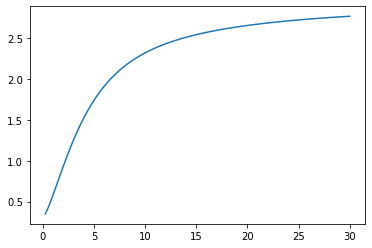

In [23]:
plt.plot(term_range, yield_curve)
plt.show()

In [24]:
#The shape is concave down but increasing. Typical for a yeild curve

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 9</b>
    </div>
    <div class = "panel-body"> 
    Modify the function <code>black_scholes_formula</code> to use the spot rate outputted from the function in the previous task as the appropriate risk-free rate in our Black-Scholes formula based on the term of the options contract.
    <br><br>Note that this means <code>rf</code> will no longer be an input to the <code>black_scholes_formula</code> function. Run <code>black_scholes_formula</code> to price the following options:
    <ul>
        <li>A call option where the stock price is \$30, strike is \$35, term is 9 months, volatility is 20%, that also pays a 2.5% annual dividend, with <code>greeks</code> set to <code>True</code>.</li>
        <li>A put option where the stock price is \$35, strike is \$30, term is 2 years, volatility is 20%, that also pays a 2.5% annual dividend, with <code>greeks</code> set to <code>True</code>.</li>
    </ul>
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

In [25]:
def black_sholes_formula(stock_price, strike, term, rf, volatility, dividend, option = 'call', greek = 'false'):
    d1 = (1/(volatility*(term**.5)))*((np.log(stock_price/strike))+((rf - dividend +(.5*(volatility**2)))*term))
    d2 = d1 - volatility*(term**.5)
    
    if option == 'call' and greek == 'true':
        delta = norm.cdf(d1)
        gamma = norm.pdf(d1)/(stock_price*volatility*np.sqrt(term))
        theta = (-(stock_price*norm.pdf(d1)*volatility)/(2*np.sqrt(term)-rf*strike*np.exp(-rf*term)*norm.pdf(d2)))/360
        vega = (stock_price*norm.pdf(d1)*np.sqrt(term))/100
        rho = strike*term*np.exp(-rf*term)*norm.cdf(d2)/100
        call = stock_price*np.exp(-dividend*term) * norm.cdf(d1) - strike * (np.exp(-rf * term)) * norm.cdf(d2)
        put = (strike * (np.exp(-rf * term)) * norm.cdf(-d2)) - stock_price * norm.cdf(-d1)
        print('call =', call) , print('delta =', delta) , print('gamma =', gamma) , print('theta =',theta) , print('vega =', vega) , print('rho =', rho)
    
    elif option == 'call' and greek == 'false':
        call = stock_price*np.exp(-dividend*term) * norm.cdf(d1) - strike * (np.exp(-rf * term)) * norm.cdf(d2)
        put = (strike * (np.exp(-rf * term)) * norm.cdf(-d2)) - stock_price * norm.cdf(-d1)
        print('call =', call)

    elif option == 'put' and greek == 'true':
        delta = norm.cdf(d1)
        gamma = norm.pdf(d1)/(stock_price*volatility*np.sqrt(term))
        theta = (-(stock_price*norm.pdf(d1)*volatility)/(2*np.sqrt(term)-rf*strike*np.exp(-rf*term)*norm.pdf(d2)))/360
        vega = (stock_price*norm.pdf(d1)*np.sqrt(term))/100
        rho = strike*term*np.exp(-rf*term)*norm.cdf(d2)/100
        call = stock_price*np.exp(-dividend*term) * norm.cdf(d1) - strike * (np.exp(-rf * term)) * norm.cdf(d2)
        put = (strike * (np.exp(-rf * term)) * norm.cdf(-d2)) - stock_price * norm.cdf(-d1)
        print('put =', put) , print('delta =', delta) , print('gamma =', gamma) , print('theta =',theta) , print('vega =', vega) , print('rho =', rho)
    else: 
        put = (strike * (np.exp(-rf * term)) * norm.cdf(-d2)) - stock_price * norm.cdf(-d1)
        print('put =', put)
        
#_# same function defined before excluding rf

In [26]:
black_sholes_formula(30, 35, .75, spot_rate(.75), .2, .025, 'call', 'true')

call = 5.649714285468814
delta = 0.8942662278821744
gamma = 0.03517103604251552
theta = 0.0031943959104407177
vega = 0.04748089865739596
rho = 0.1550995073880791


In [27]:
black_sholes_formula(35, 30, 2, spot_rate(2) , .2, .025, 'put', 'true')

put = -2.2905783064362733e-13
delta = 0.9999999999993964
gamma = 4.415111013574576e-13
theta = -3.0047283288268725e-14
vega = 2.163404396651542e-12
rho = 0.09290864391640415


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 10</b>
    </div>
    <div class = "panel-body"> 
    On June 30th, 2020, the AAPL's stock price was valued at \$364.14 and paying a dividend yield of 0.9%. On that same day, a call option on AAPL with a strike of \$380, expiring in 6-months was trading at \$26.
    <br><br>Estimate the implied volatility on this call option using the bisection method with a tolerance of $0.001 on the error of the calculated Black-Scholes call option price. Set <code>option</code> to <code>call</code> and <code>greeks</code> to <code>False</code> when calling the function <code>black_scholes_formula</code>.
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

In [28]:
def black_sholes_formula(stock_price, strike, term, rf, volatility, dividend, option = 'call', greek = 'false'):
    d1 = (1/(volatility*(term**.5)))*((np.log(stock_price/strike))+((rf - dividend +(.5*(volatility**2)))*term))
    d2 = d1 - volatility*(term**.5)
    call = stock_price*np.exp(-dividend*term) * norm.cdf(d1) - strike * (np.exp(-rf * term)) * norm.cdf(d2)
    
    return call

In [29]:
black_sholes_formula(364.14, 380, .5, .01, .3, .009, 'call', 'false')

24.092348949638392

In [30]:
black_sholes_formula(364.14, 380, .5, .01, .35, .009, 'call', 'false')

29.19285537136338

In [31]:
left_vol = .3
right_vol = .35

In [ ]:
call_iv = black_sholes_formula(364.14, 380, .5, .01, .3, .009, 'call', 'false')
iteration = 0
imp_vol = volatility

while abs(call_iv) > .001:
    imp_vol = (left_vol + right_vol) / 2.
    call_iv = black_sholes_formula(364.14, 380, .5, .01, .3, .009, 'call', 'false')
    
    if (call_iv < 0 and left_vol < 0) or (call_iv > 0 and left_vol < 0):
        left_vol = imp_vol
    else: 
        right_vol = imp_vol
    
    iteration += 1